<a href="https://colab.research.google.com/github/ADITYARAJIV/py/blob/master/Pycaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')

In [3]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 16.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 74.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 59.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 56.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 63.2 MB/s eta 0:

In [4]:
data = dataset.sample(frac = 0.80, random_state = 1).reset_index(drop = True)
data_unseen = dataset.drop(data.index).reset_index(drop = True)

In [5]:
from pycaret.classification import *

In [6]:
exp_clf = setup(data = data, target = 'Purchased', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Purchased
2,Target type,Binary
3,Original data shape,"(320, 5)"
4,Transformed data shape,"(320, 5)"
5,Transformed train set shape,"(224, 5)"
6,Transformed test set shape,"(96, 5)"
7,Ordinal features,1
8,Numeric features,3
9,Categorical features,1


In [7]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.9016,0.9525,0.8500,0.8728,0.8591,0.7837,0.7861,0.1430
et,Extra Trees Classifier,0.8883,0.9346,0.8500,0.8423,0.8409,0.7551,0.7608,0.6800
rf,Random Forest Classifier,0.8881,0.9363,0.8500,0.8399,0.8400,0.7544,0.7597,0.5090
nb,Naive Bayes,0.8702,0.9422,0.7500,0.8609,0.7936,0.7024,0.7115,0.2610
ada,Ada Boost Classifier,0.8660,0.9061,0.7625,0.8371,0.7883,0.6936,0.7025,0.5680
gbc,Gradient Boosting Classifier,0.8656,0.9364,0.8250,0.8123,0.8082,0.7060,0.7168,0.3570
lightgbm,Light Gradient Boosting Machine,0.8569,0.9295,0.8000,0.8059,0.7946,0.6854,0.6935,0.2670
dt,Decision Tree Classifier,0.8431,0.8249,0.7607,0.8012,0.7736,0.6544,0.6615,0.2410
xgboost,Extreme Gradient Boosting,0.8385,0.9185,0.7750,0.7744,0.7664,0.6442,0.6528,0.2580
lda,Linear Discriminant Analysis,0.8170,0.8992,0.6107,0.8317,0.6987,0.5732,0.5915,0.1370


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [8]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9565,1.0000,0.8750,1.0000,0.9333,0.9013,0.9057
1,0.7826,0.8625,0.6250,0.7143,0.6667,0.5064,0.5089
2,0.9130,0.8750,0.8750,0.8750,0.8750,0.8083,0.8083
3,0.9565,0.9750,1.0000,0.8889,0.9412,0.9069,0.9108
4,0.9545,0.9762,1.0000,0.8750,0.9333,0.8991,0.9037
5,0.8636,0.8884,0.8750,0.7778,0.8235,0.7130,0.7163
6,0.8182,0.9062,0.6250,0.8333,0.7143,0.5849,0.5979
7,0.8636,0.9420,0.7500,0.8571,0.8000,0.6972,0.7008
8,0.8636,0.9509,0.8750,0.7778,0.8235,0.7130,0.7163


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [9]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.8261,0.8417,0.7500,0.7500,0.7500,0.6167,0.6167
2,0.9130,0.9042,0.8750,0.8750,0.8750,0.8083,0.8083
3,0.9565,0.9667,1.0000,0.8889,0.9412,0.9069,0.9108
4,0.9545,1.0000,1.0000,0.8750,0.9333,0.8991,0.9037
5,0.8636,0.8839,0.8750,0.7778,0.8235,0.7130,0.7163
6,0.8636,0.8929,0.7500,0.8571,0.8000,0.6972,0.7008
7,0.8636,0.9107,0.7500,0.8571,0.8000,0.6972,0.7008
8,0.9091,0.9554,1.0000,0.8000,0.8889,0.8136,0.8281


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


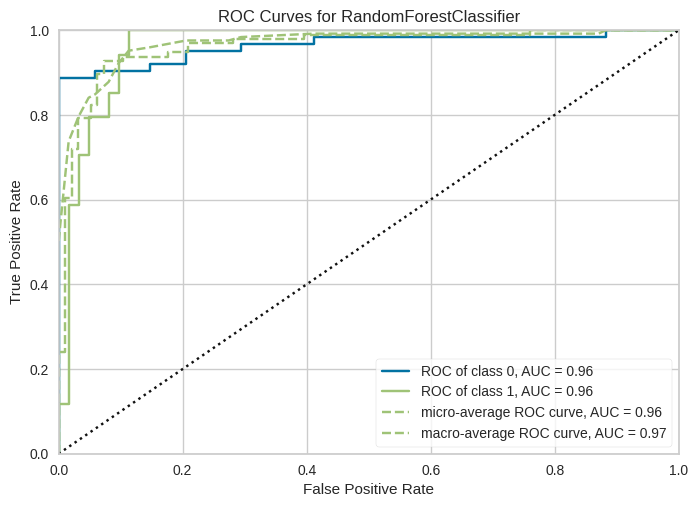

In [10]:
plot_model(tuned_rf, plot = 'auc')

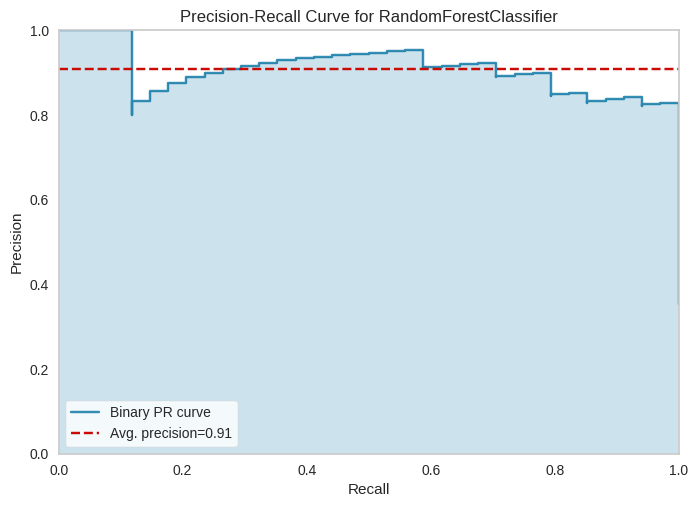

In [11]:
plot_model(tuned_rf, plot = 'pr')

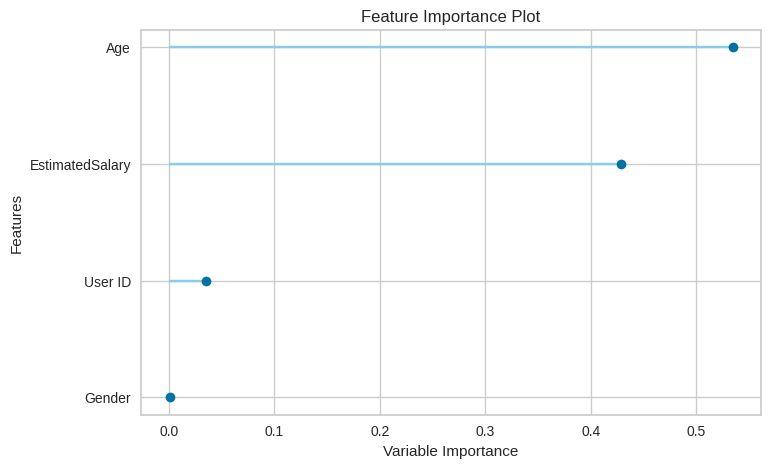

In [12]:
plot_model(tuned_rf, plot = 'feature')

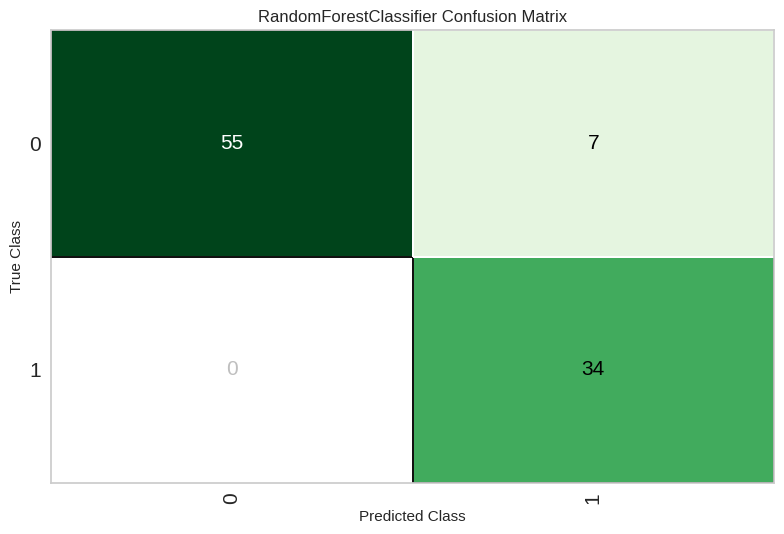

In [13]:
plot_model(tuned_rf, plot = 'confusion_matrix')

In [14]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [15]:
predict_model(tuned_rf)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9271,0.9644,1.0000,0.8293,0.9067,0.8477,0.8577


,User ID,Gender,Age,EstimatedSalary,Purchased,prediction_label,prediction_score
229,15807837,Male,48,33000,1,1,0.7918
266,15625395,Male,55,39000,1,1,0.9497
310,15668575,Female,26,43000,0,0,0.9685
198,15798659,Female,30,62000,0,0,0.9538
36,15642885,Male,22,18000,0,0,0.9858
...,...,...,...,...,...,...,...
274,15654901,Female,27,58000,0,0,0.9690
195,15579781,Female,29,47000,0,0,0.9637
268,15582492,Male,28,123000,1,1,0.8507
27,15708196,Male,49,74000,0,1,0.8892


In [16]:
predict_model(tuned_rf, data = data_unseen)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9625,0.9966,0.9608,0.9800,0.9703,0.9195,0.9198


,User ID,Gender,Age,EstimatedSalary,Purchased,prediction_label,prediction_score
0,15774872,Female,52,138000,1,1,0.8654
1,15611191,Female,53,82000,1,1,0.9073
2,15674331,Male,41,52000,0,0,0.8636
3,15619465,Female,48,30000,1,1,0.9544
4,15575247,Female,48,131000,1,1,0.8118
...,...,...,...,...,...,...,...
75,15691863,Female,46,41000,1,1,0.9351
76,15706071,Male,51,23000,1,1,0.9496
77,15654296,Female,50,20000,1,1,0.9048
78,15755018,Male,36,33000,0,0,0.9574


In [17]:
save_model(tuned_rf, 'tuned_rf_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['User ID', 'Age',
                                              'EstimatedSalary'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose='deprecated'))),
                 ('categorical_imputer',
                  TransformerWrapper...
                  RandomForestClassifier(bootstrap=False, ccp_alpha=0